# Otniel Abiezer - 1301180469

## Load Data

Import Library

In [106]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams
import warnings


Mengatur Style

In [107]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

Melakukan import data. Cukup lama karena datanya berat

In [108]:
df_kendaraan_train = pd.read_excel('https://drive.google.com/uc?id=1KtKBdDVLG1nh9-i_7_F47Absasy_mJQ2')
df_kendaraan_test = pd.read_excel('https://drive.google.com/uc?id=1lanpFn-fkiBMMjX99otmqjswW8Eeagbx')

Isi data training

In [109]:
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Isi data testing

In [110]:
df_kendaraan_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## Data Exploration

### Train

Untuk menampilkan ukuran dataset

In [111]:
df_kendaraan_train.shape

(285831, 12)

Mengetahui nilai null dan juga tipe data setiap kolom

In [112]:
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Mengetahui statistik setiap kolom

In [113]:
df_kendaraan_train.describe(include='all')

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271391,271617.000000,271427.000000,271525.000000,271602.000000,271556,271643,271262.000000,271532.000000,271839.000000,285831.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,NaN,146678,NaN,NaN,NaN,NaN,142761,137123,NaN,NaN,NaN,NaN
mean,142916.000000,NaN,38.844336,0.997848,26.405410,0.458778,NaN,NaN,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,NaN,15.522487,0.046335,13.252714,0.498299,NaN,NaN,17155.000770,54.202457,83.694910,0.327830
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39377.750000,152.000000,227.000000,0.000000


Membagi kolom ke dalam 2 kategori berdasarkan tipe datanya

In [114]:
kategorikal = ['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']
numerikal = ['id', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']

#### Univariate Analysis

Menampilkan Box Plot agar mengetahui outlier

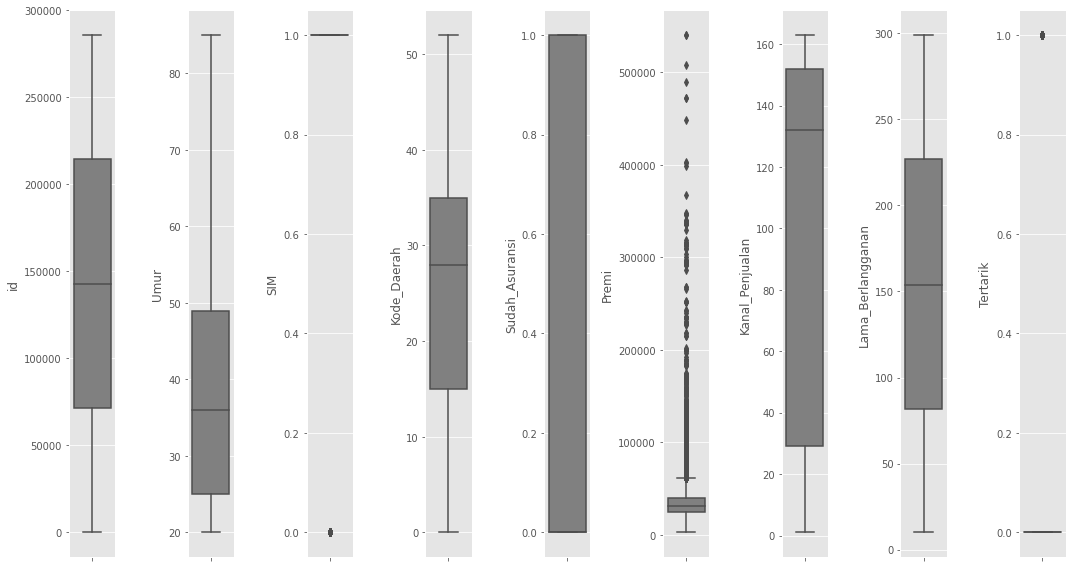

In [115]:
for i in range(0, len(numerikal)):
    plt.subplot(1, len(numerikal), i+1)
    sns.boxplot(y=df_kendaraan_train[numerikal[i]], color='gray', orient='v')
    plt.tight_layout()

Menampilkan persebaran data

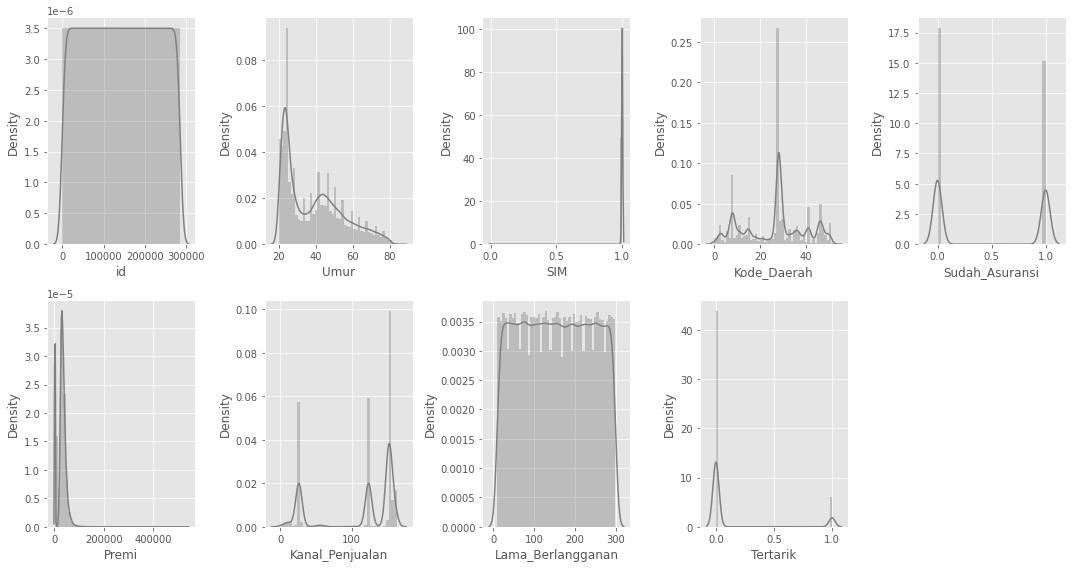

In [116]:
for i in range(0, len(numerikal)):
    plt.subplot(2, 5, i+1)
    sns.distplot(df_kendaraan_train[numerikal[i]], color='gray')
    plt.tight_layout()

Untuk data kategorikal, menampilkan frekuensi

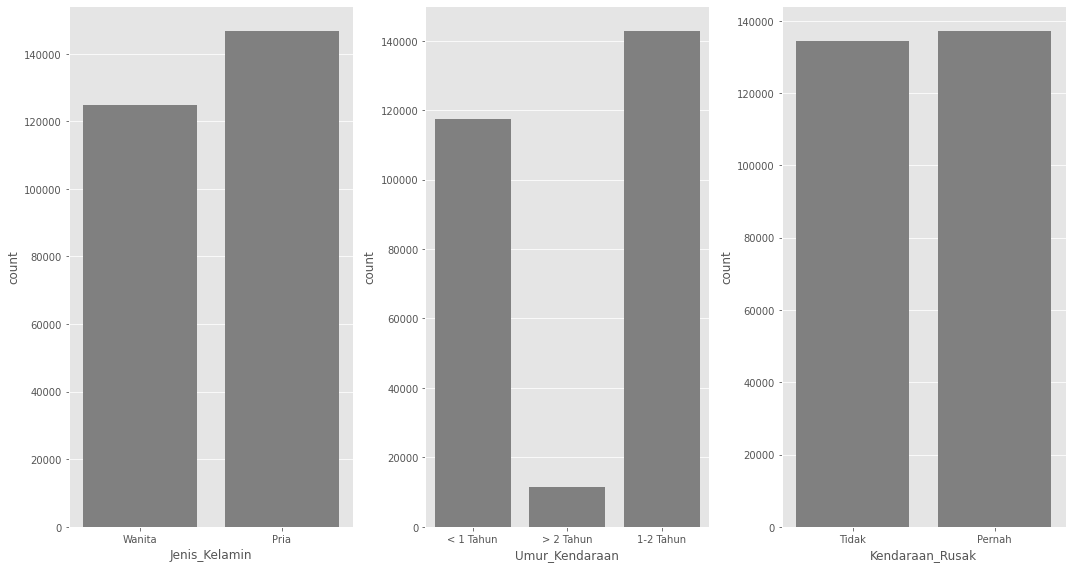

In [117]:
for i in range(0, len(kategorikal)):
    plt.subplot(1, 3, i+1)
    sns.countplot(df_kendaraan_train[kategorikal[i]], color='gray', orient='v')
    plt.tight_layout()

#### Bivariate Analysis

Korelasi

In [118]:
df_kendaraan_train.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


Visualisasi korelasi dengan heatmap

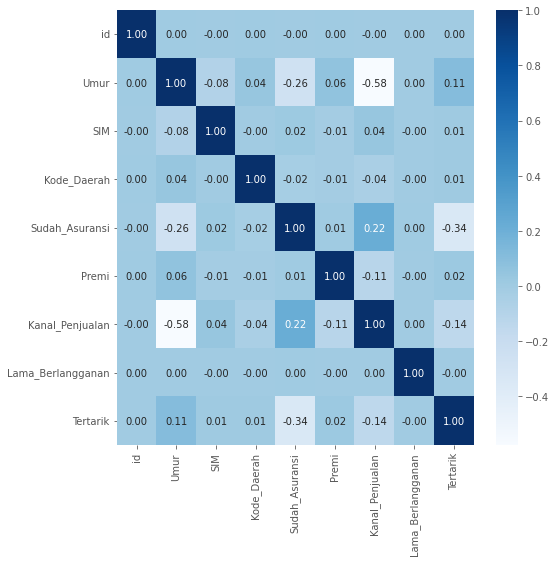

In [119]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_kendaraan_train.corr(), cmap='Blues', annot=True, fmt='.2f')

### Test

In [120]:
df_kendaraan_test.shape

(47639, 11)

In [121]:
df_kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [122]:
df_kendaraan_test.describe(include='all')

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639,47639.000000,47639.000000,47639.000000,47639.000000,47639,47639,47639.000000,47639.000000,47639.000000,47639.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,25870,NaN,NaN,NaN,NaN,24966,24041,NaN,NaN,NaN,NaN
mean,NaN,38.815466,0.997922,26.331514,0.457608,NaN,NaN,30626.481202,112.180566,154.447574,0.123029
std,NaN,15.548817,0.045540,13.213353,0.498205,NaN,NaN,17404.792248,54.162703,83.642137,0.328474
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24395.500000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31738.000000,135.000000,155.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39474.500000,152.000000,227.000000,0.000000


## Data Preprocessing

### Categorical Encoding

Mengubah kategori menjadi numerik dengan label encoding

In [123]:
cat_to_num = {"Jenis_Kelamin":     {"Wanita": 1.0, "Pria": 0.0},
              "Kendaraan_Rusak": {"Tidak": 0.0, "Pernah": 1.0},
              "Umur_Kendaraan" : {"< 1 Tahun": 0.0, "1-2 Tahun": 0.5, "> 2 Tahun": 1}}

df_kendaraan_train = df_kendaraan_train.replace(cat_to_num)
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  float64
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  float64
 7   Kendaraan_Rusak    271643 non-null  float64
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 26.2 MB


### Feature Selection

Menampilkan heatmap korelasi lagi setelah mengubah kategorikal menjadi numerikal untuk melakukan feature selection

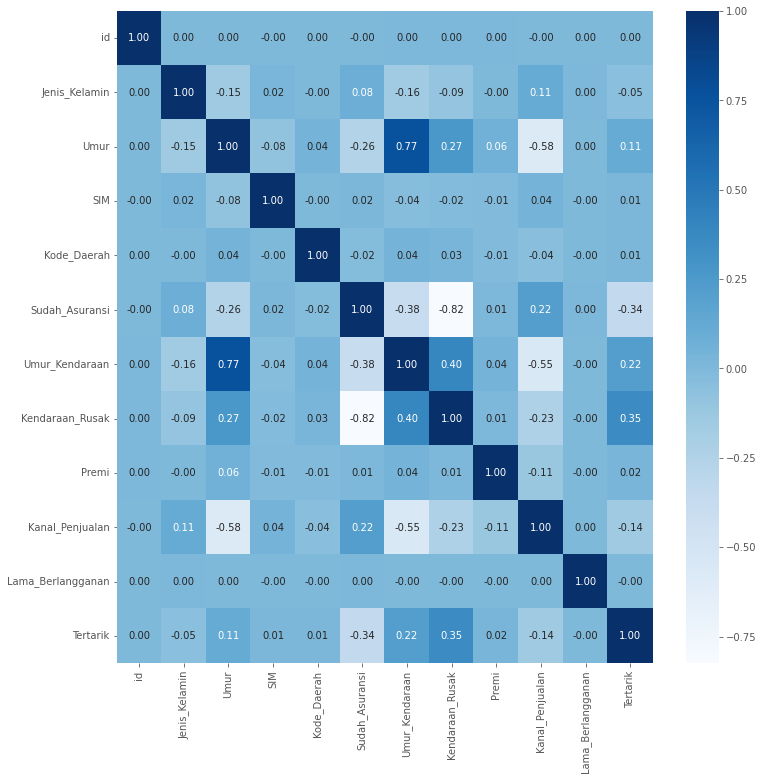

In [136]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_kendaraan_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pemilihan

In [312]:
model = df_kendaraan_train[['id', 'Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik']]
model = model.reset_index()
model = model.drop(columns=['index'])
model.head()

,id,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Tertarik
0,1,30.0,1.0,0.0,0.0,0
1,2,48.0,0.0,1.0,1.0,0
2,3,21.0,1.0,0.0,0.0,0
3,4,58.0,0.0,0.5,0.0,0
4,5,50.0,0.0,1.0,NaN,0


### Missing Value

Mengetahui persen missing value di setiap kolom

In [313]:
model.isnull().sum() / model.shape[0] * 100

id                 0.000000
Umur               4.972869
Sudah_Asuransi     4.978116
Umur_Kendaraan     4.994210
Kendaraan_Rusak    4.963772
Tertarik           0.000000
dtype: float64

Persen data yang dipakai setelah menghilangkan missing value

In [314]:
data_awal = model.shape[0]
model.dropna(inplace=True)
model.shape[0] / data_awal * 100

81.505505001207

### Undersampling

Menghitung banyaknya nilai pada Tertarik 

In [150]:
vis_tertarik = model.groupby('Tertarik')['id'].count()
vis_tertarik

Tertarik
0    204529
1     28439
Name: id, dtype: int64

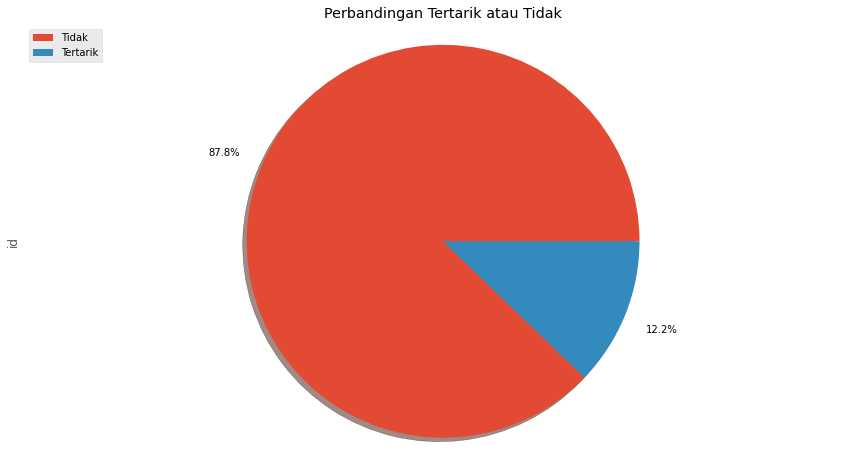

In [128]:
vis_tertarik.plot(kind='pie',
               autopct='%1.1f%%',   
               shadow=True,       
               labels=None,
               pctdistance=1.2,
              )
plt.legend(labels = ['Tidak', 'Tertarik'], loc='upper left')
plt.title("Perbandingan Tertarik atau Tidak")
plt.axis('equal') 
plt.show()

In [315]:
persen_tidak_tertarik = 75    #nilai bisa diubah

Mengambil dataframe dengan nilai Tertarik = 1

In [316]:
tertarik = model[model['Tertarik'] == 1]
tertarik.shape[0]

28439

Mengambil dataframe dengan nilai Tertarik = 0, lalu digabungkan dengan sebelumnya

In [317]:
tidak_tertarik = model[model['Tertarik'] == 0].sample(int(tertarik.shape[0]/(100-persen_tidak_tertarik)*persen_tidak_tertarik))
tidak_tertarik.shape[0]
model = pd.concat([tertarik, tidak_tertarik])
model.shape[0]

113756

Mengurutkan sesuai ID

In [318]:
model = model.sort_values('id', ascending=True)

Pembagian, Tertarik kurang lebih 40% dan Tidak Tertarik kurang lebih 60%

In [319]:
print('Persen Tertarik', tertarik.shape[0] / model.shape[0] * 100)
print('Persen Tidak Tertarik', tidak_tertarik.shape[0] /model.shape[0] * 100)

Persen Tertarik 25.0
Persen Tidak Tertarik 75.0


### Export

Eksport data bersih

In [134]:
model.to_excel(r'kendaraan_clean.xlsx', index=False, header=True)

In [361]:
model.head()

,id,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Tertarik
0,1,30.0,1.0,0.0,0.0,0
7,8,23.0,1.0,0.0,0.0,0
8,9,20.0,1.0,0.0,0.0,0
9,10,54.0,0.0,1.0,1.0,1
14,15,66.0,1.0,0.5,0.0,0


## Modeling

In [63]:
from sklearn import tree

In [320]:
model.shape[0]

113756

Melakukan training dengan Decision Tree

In [321]:
X_train = model[['Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak']]
y_train = model['Tertarik']

pohon = tree.DecisionTreeClassifier(criterion="entropy")
pohon = pohon.fit(X_train,y_train)

Visualisasi bentuk Tree

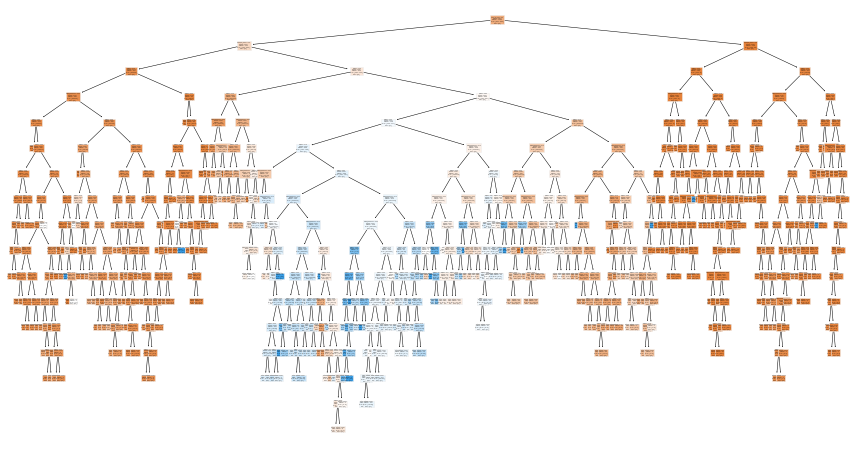

In [322]:
tree.plot_tree(pohon,
               feature_names = X_train.columns,
               class_names = True,
               filled=True)
plt.show()

Kedalaman maksimal

In [323]:
pohon.get_depth()

16

## Evaluasi

Preprocessing data uji

In [324]:
uji = df_kendaraan_test[['Umur','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik']]
uji = uji.replace(cat_to_num)
uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Umur             47639 non-null  int64  
 1   Sudah_Asuransi   47639 non-null  int64  
 2   Umur_Kendaraan   47639 non-null  float64
 3   Kendaraan_Rusak  47639 non-null  float64
 4   Tertarik         47639 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.8 MB


Melakukan Pengujian

In [325]:
X_test = uji[['Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak']]
y_test = uji['Tertarik']

predik = pohon.predict(X_test)

Metrik Evaluasi

In [326]:
from sklearn import metrics
print("DecisionTrees's Accuracy : ", metrics.accuracy_score(y_test, predik))
print("DecisionTrees's Precision: ", metrics.precision_score(y_test, predik))
print("DecisionTrees's Recall   : ", metrics.recall_score(y_test, predik))
print("DecisionTrees's F1 Score : ", metrics.f1_score(y_test, predik))

DecisionTrees's Accuracy :  0.8099876151892357
DecisionTrees's Precision:  0.3340613624544982
DecisionTrees's Recall   :  0.5480293465278963
DecisionTrees's F1 Score :  0.4150943396226416


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

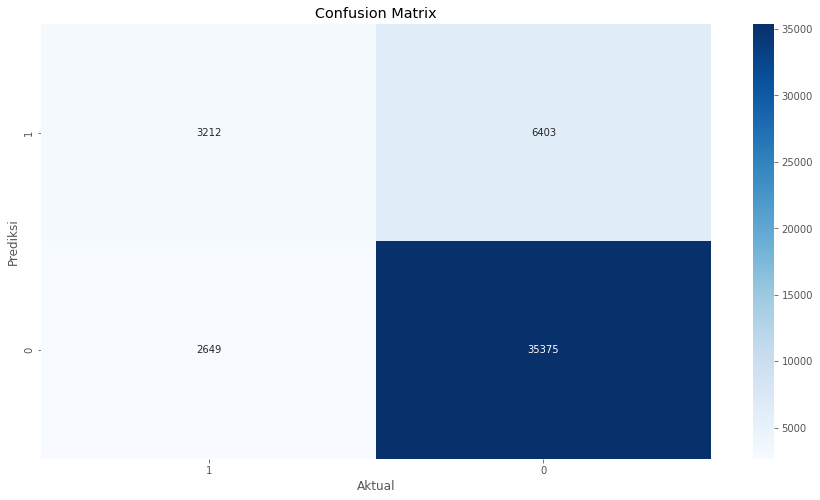

In [327]:
cf_matrix = metrics.confusion_matrix(y_test, predik, labels=[1,0]).transpose()

ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Eksperimen

### Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

Melakukan Hyperparameter Tuning

In [339]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
parameters = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9]
        }

In [340]:
search = GridSearchCV(dt,
                      parameters,
                      scoring='accuracy',
                      cv = 5,
                      verbose=3)
search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......................max_depth=3;, score=0.750 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.750 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.750 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.750 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.750 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.760 total time=   0.0s
[CV 2/5] END .......................max_depth=4;, score=0.768 total time=   0.0s
[CV 3/5] END .......................max_depth=4;, score=0.760 total time=   0.0s
[CV 4/5] END .......................max_depth=4;, score=0.766 total time=   0.1s
[CV 5/5] END .......................max_depth=4;, score=0.764 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.768 total time=   0.0s
[CV 2/5] END .......................max_depth=5;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=3)

Parameter optimum

In [341]:
search.best_score_, search.best_params_

(0.7729790230855527, {'max_depth': 9})

Melakukan pelatihan dengan parameter optimum

In [342]:
pohon = tree.DecisionTreeClassifier(criterion="entropy", max_depth=9)
pohon = pohon.fit(X_train,y_train)

In [343]:
predik = pohon.predict(X_test)

Metrik Evaluasi

In [344]:
print("DecisionTrees's Accuracy : ", metrics.accuracy_score(y_test, predik))
print("DecisionTrees's Precision: ", metrics.precision_score(y_test, predik))
print("DecisionTrees's Recall   : ", metrics.recall_score(y_test, predik))
print("DecisionTrees's F1 Score : ", metrics.f1_score(y_test, predik))

DecisionTrees's Accuracy :  0.8013812212682886
DecisionTrees's Precision:  0.33108171498264377
DecisionTrees's Recall   :  0.6021156799181027
DecisionTrees's F1 Score :  0.42723970944309925


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

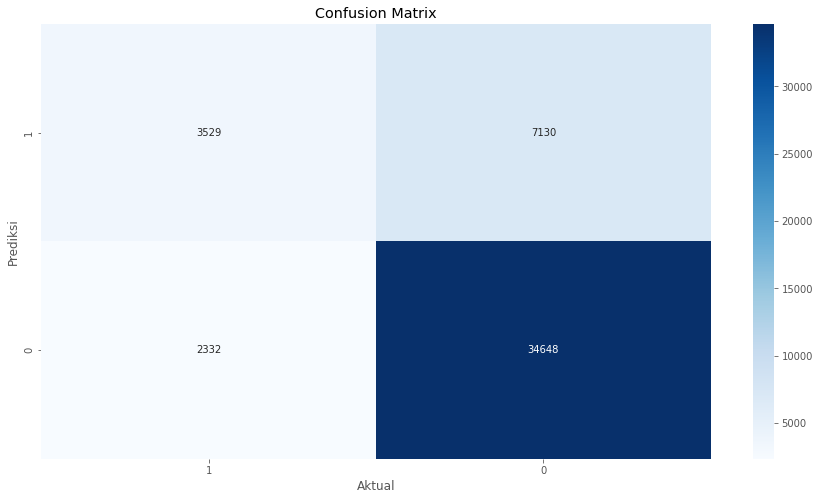

In [345]:
cf_matrix = metrics.confusion_matrix(y_test, predik, labels=[1,0]).transpose()

ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Visualisasi Decision Tree

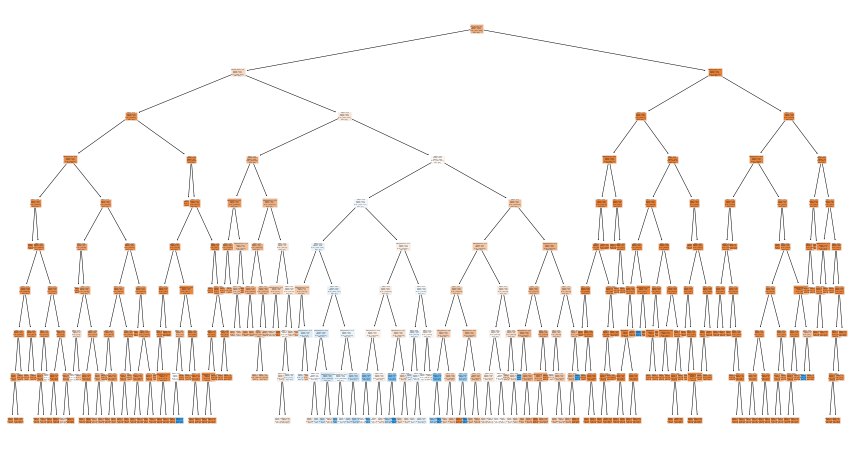

In [360]:
#plt.figure(figsize=(70,70))
tree.plot_tree(pohon,
               feature_names = X_train.columns,
               class_names = True,
               filled=True)
plt.show()

## Sampling Experiment

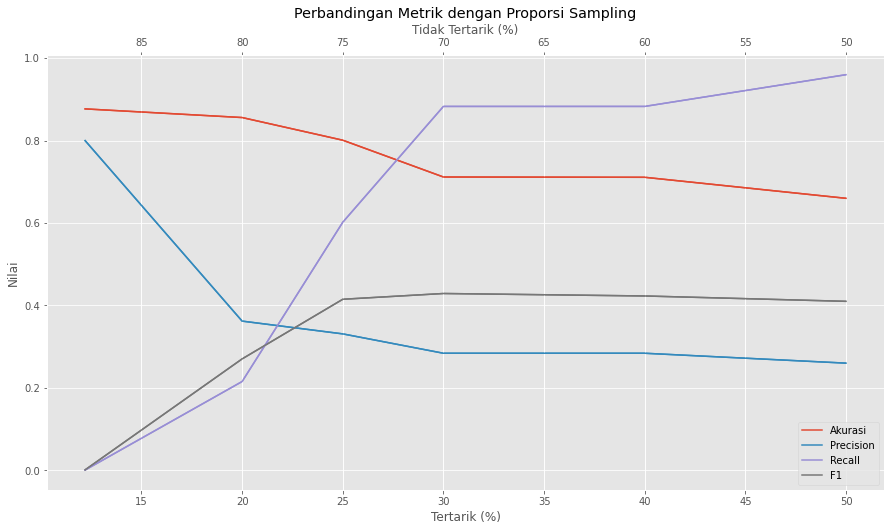

In [357]:
nilai_acc = [0.877, 0.856, 0.801, 0.7117, 0.711, 0.66]
nilai_prec = [0.8, 0.362, 0.331, 0.284, 0.284, 0.26]
nilai_recall = [0.0006, 0.2154, 0.602, 0.883, 0.883, 0.96]
nilai_f1 = [0.001, 0.2703, 0.415, 0.429, 0.423, 0.41]

proporsi_tertarik = [12.2, 20, 25, 30, 40, 50]
proporsi_tdk = [87.8, 80, 75, 70, 60, 50]

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.plot(proporsi_tertarik, nilai_acc )
ax1.plot(proporsi_tertarik, nilai_prec)
ax1.plot(proporsi_tertarik, nilai_recall)
ax1.plot(proporsi_tertarik, nilai_f1)
ax1.set_xlabel('Tertarik (%)')
ax1.set_ylabel('Nilai')

ax2 = ax1.twiny()

ax2.plot(proporsi_tdk, nilai_acc)
ax2.plot(proporsi_tdk, nilai_prec)
ax2.plot(proporsi_tdk, nilai_recall)
ax2.plot(proporsi_tdk, nilai_f1)
ax2.set_xlabel('Tidak Tertarik (%)')

ax2.invert_xaxis()

plt.legend(['Akurasi', 'Precision', 'Recall', 'F1'])
plt.title('Perbandingan Metrik dengan Proporsi Sampling')
plt.show()